<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,8

# Lab 11: Linear Regression

```
Module Coordinator : Akshit Garg
```


Linear regression is a technique that is used to model a linear relationship between some data $x$ and its corresponding output $y$. When there are multiple inputs ($x_1, x_2, .. , x_n$), it is referred to as **Mutliple Linear Regression**. 

Essentially, we model the relationship as $y = mx + c$. Linear regression attempts to find the $m$ and $c$ values. 

To understand how linear regression works, let's first look at an example.

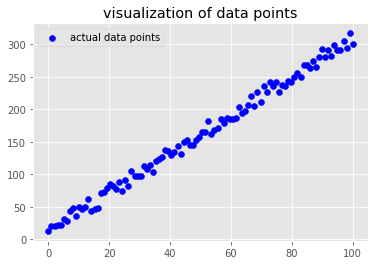

In [2]:
#generating random points and adding noise
np.random.seed(0)
x=np.linspace(0,100,100).reshape((-1,1))
y=(np.random.rand(100)*25).astype(int).reshape((-1,1)) +3*x

plt.title('visualization of data points')
plt.scatter(x,y,color='b')
plt.legend(['actual data points'])
plt.show()

## Brute-force solution

Let's first think of a naive appraoch to this problem. Since we want to find the values of $m$ and $c$, we can do a search in the space of possible $m$ and $c$ values, and pick the line with the least average distance from the actual data.

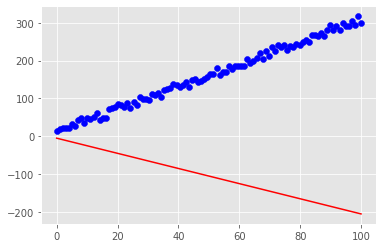

average distance: 266.32



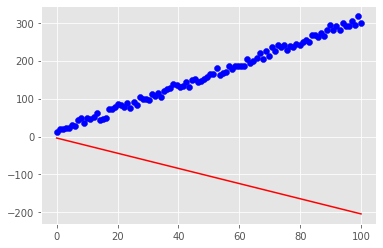

average distance: 265.32



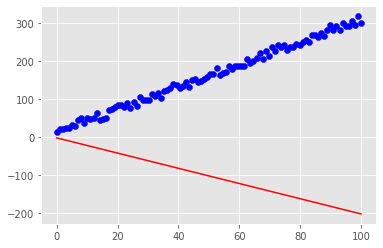

average distance: 264.32



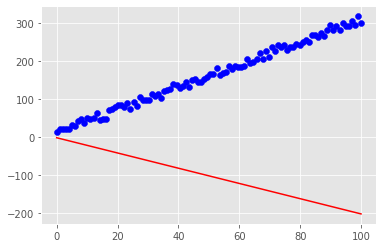

average distance: 263.32



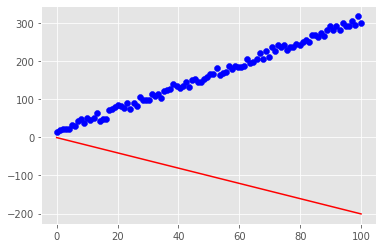

average distance: 262.32



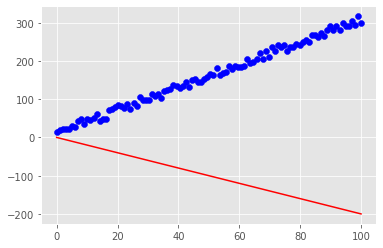

average distance: 261.32



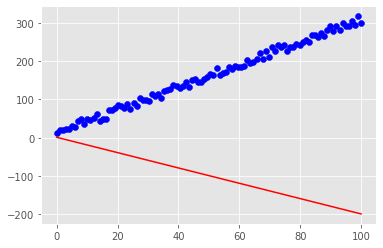

average distance: 260.32



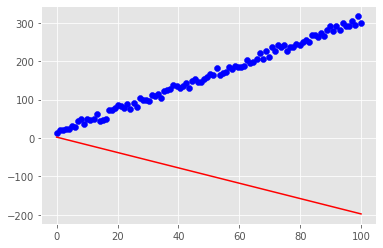

average distance: 259.32



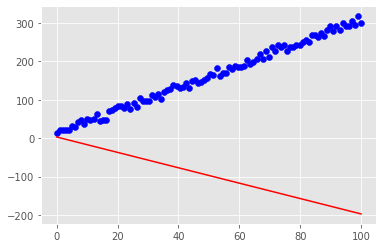

average distance: 258.32



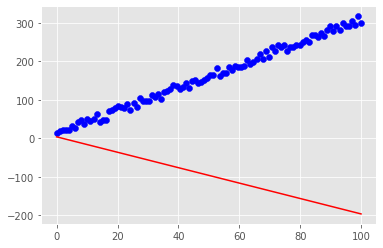

average distance: 257.32



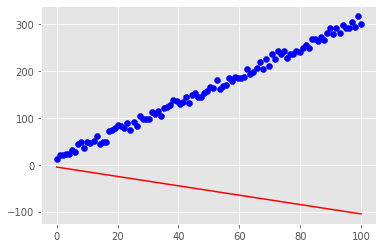

average distance: 216.32000000000005



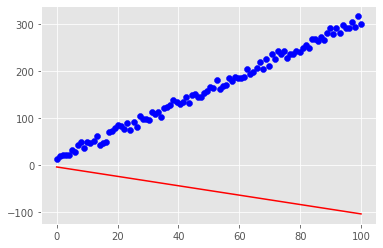

average distance: 215.32000000000005



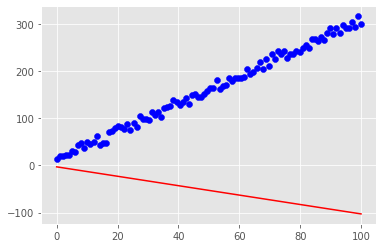

average distance: 214.32000000000005



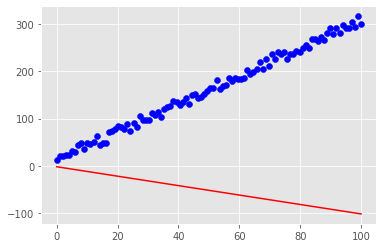

average distance: 213.32000000000005



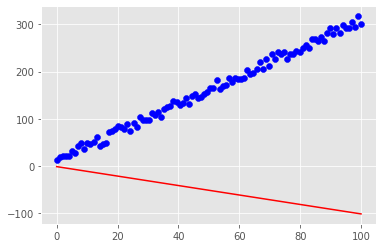

average distance: 212.32000000000005



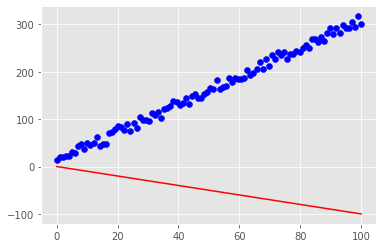

average distance: 211.32000000000005



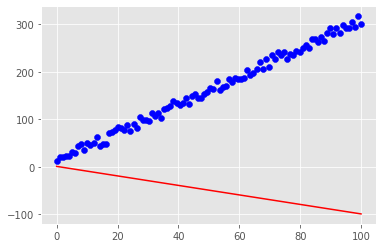

average distance: 210.32000000000005



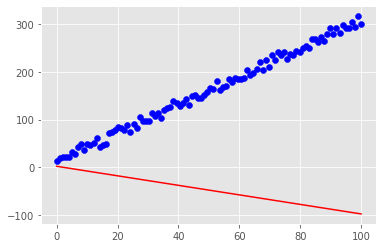

average distance: 209.32000000000005



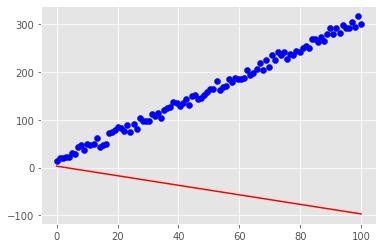

average distance: 208.32000000000005



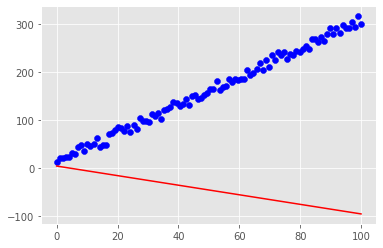

average distance: 207.32000000000005



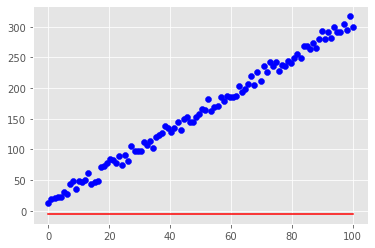

average distance: 166.32



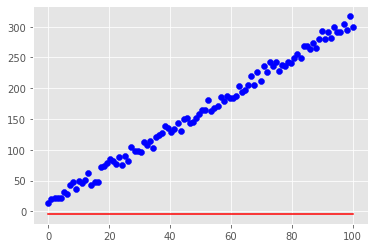

average distance: 165.32



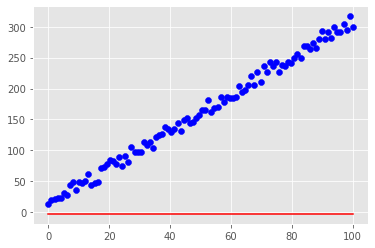

average distance: 164.32



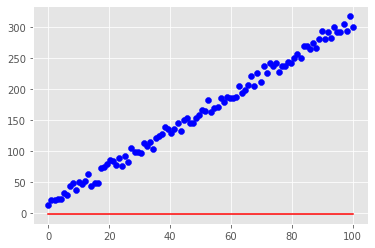

average distance: 163.32



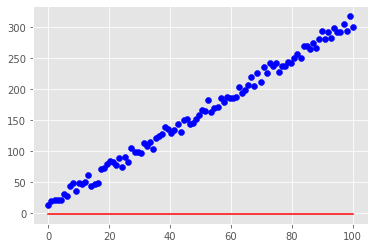

average distance: 162.32



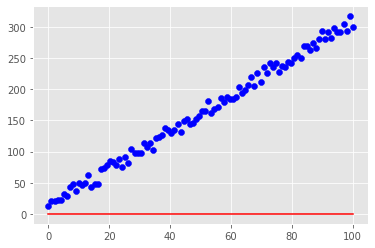

average distance: 161.32



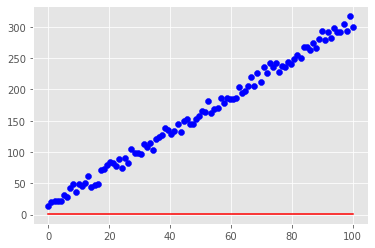

average distance: 160.32



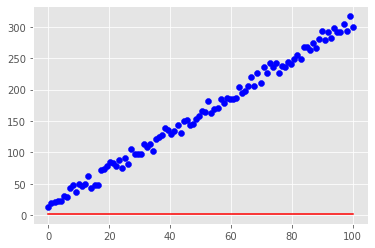

average distance: 159.32



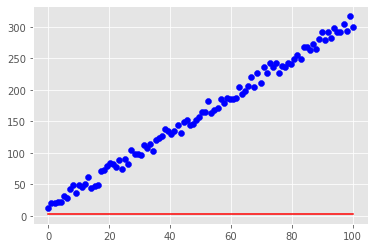

average distance: 158.32



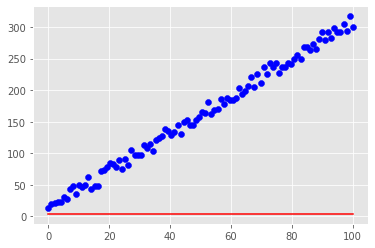

average distance: 157.32



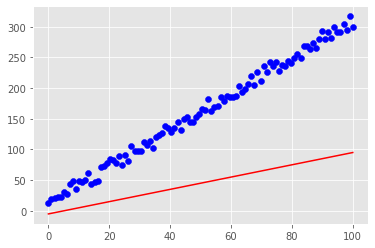

average distance: 116.32



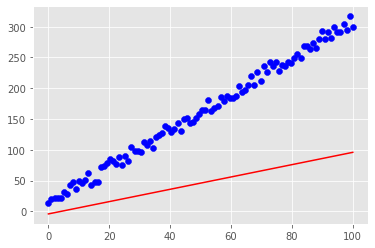

average distance: 115.32



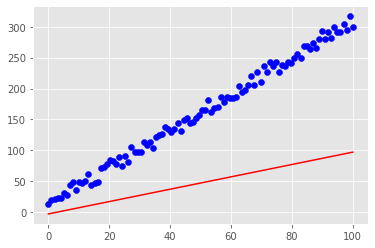

average distance: 114.32



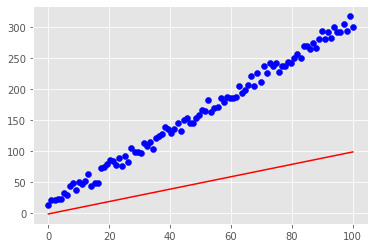

average distance: 113.32



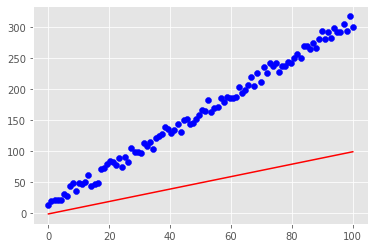

average distance: 112.32



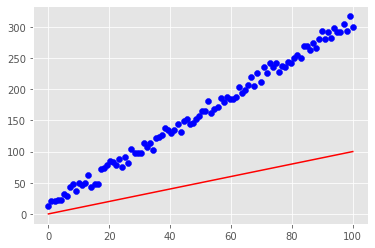

average distance: 111.32



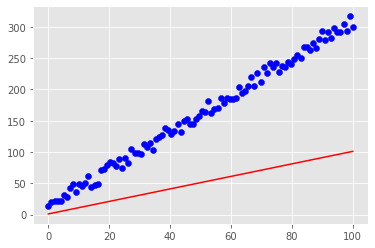

average distance: 110.32



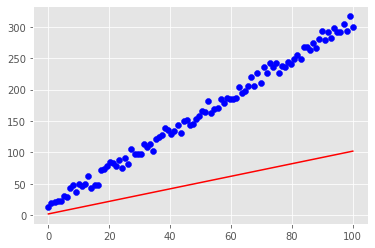

average distance: 109.32



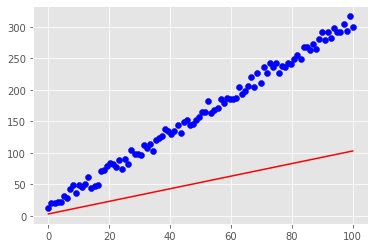

average distance: 108.32



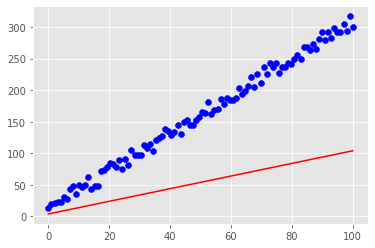

average distance: 107.32



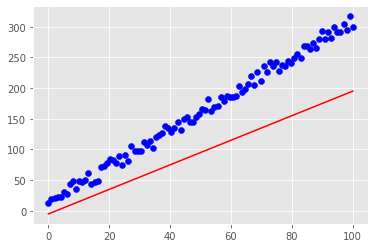

average distance: 66.32



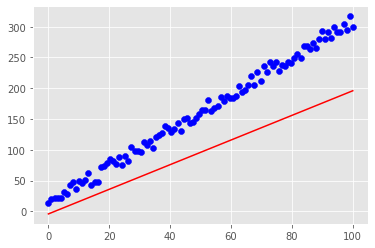

average distance: 65.32



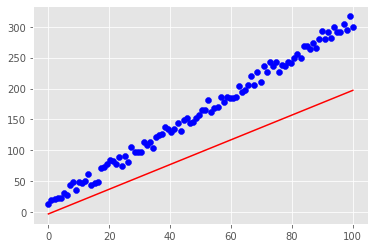

average distance: 64.32



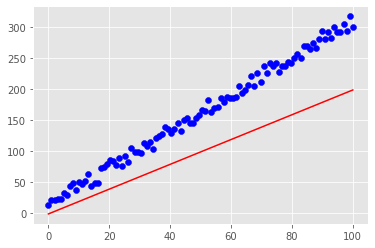

average distance: 63.32



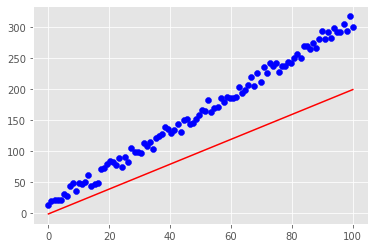

average distance: 62.32



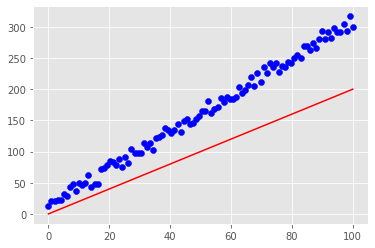

average distance: 61.32



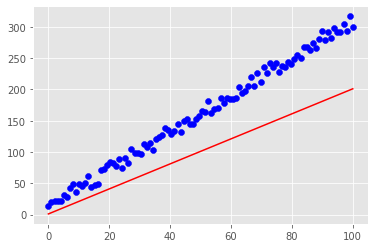

average distance: 60.32



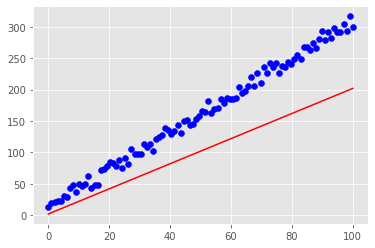

average distance: 59.32



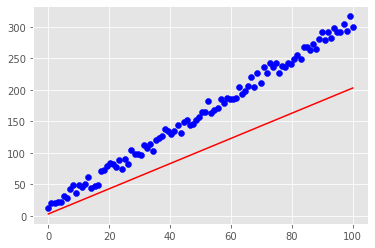

average distance: 58.32



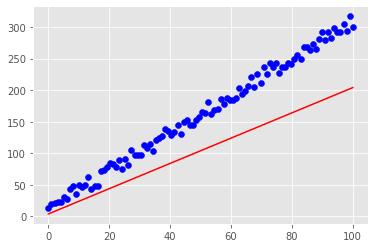

average distance: 57.32



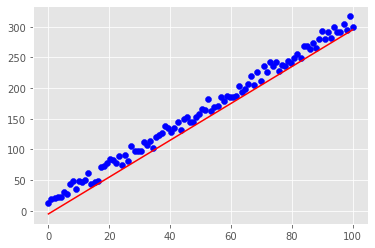

average distance: 16.32



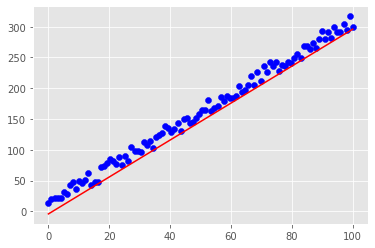

average distance: 15.32



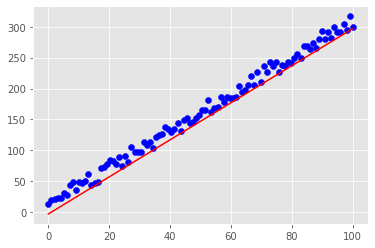

average distance: 14.32



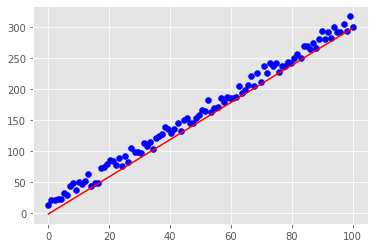

average distance: 13.32



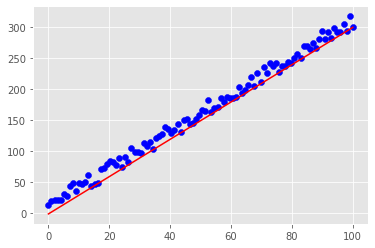

average distance: 12.32



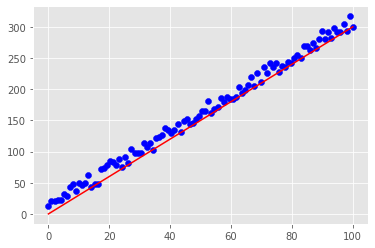

average distance: 11.32



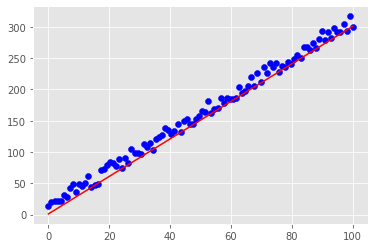

average distance: 10.42



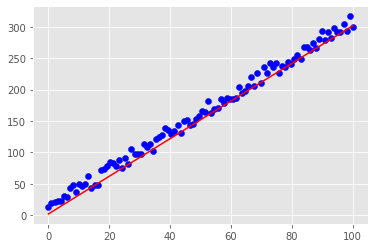

average distance: 9.58



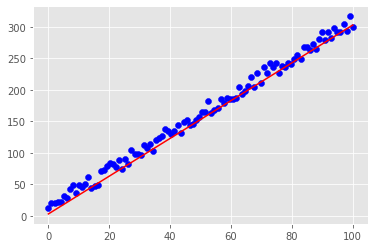

average distance: 8.9



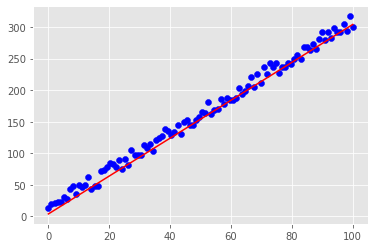

average distance: 8.34



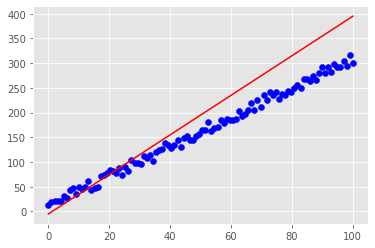

average distance: 38.27232323232324



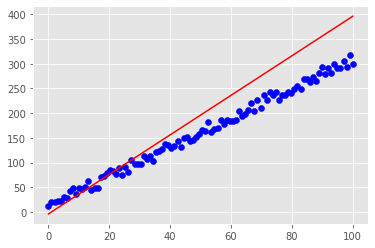

average distance: 38.86242424242425



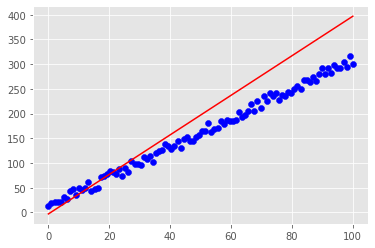

average distance: 39.48242424242425



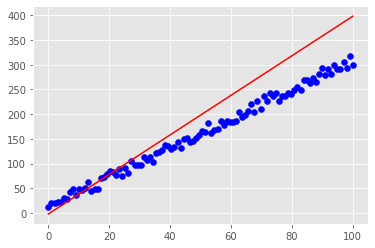

average distance: 40.10666666666667



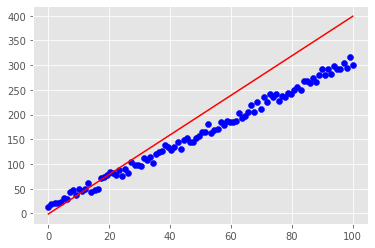

average distance: 40.74666666666667



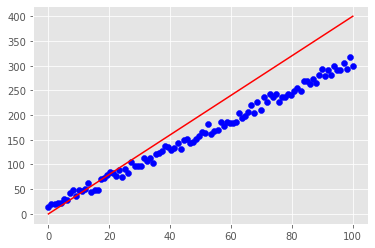

average distance: 41.38848484848485



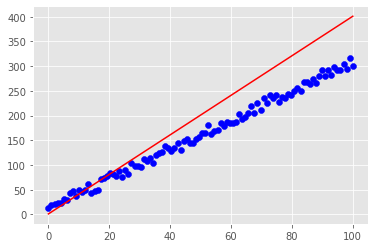

average distance: 42.05212121212122



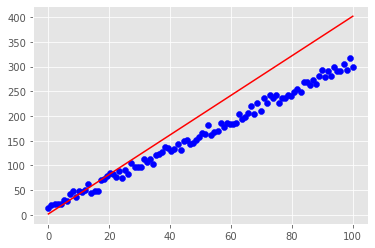

average distance: 42.74060606060607



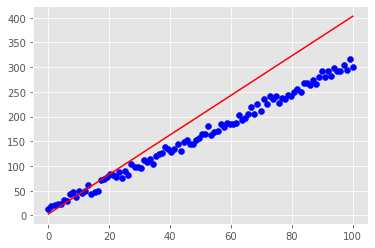

average distance: 43.484040404040414



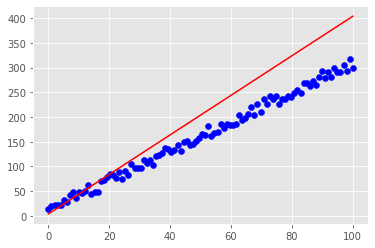

average distance: 44.249292929292935



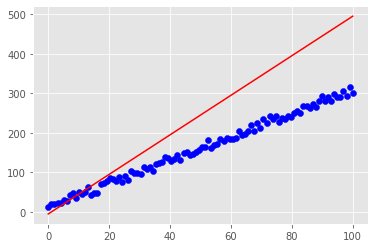

average distance: 86.03616161616162



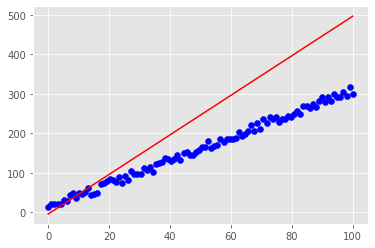

average distance: 86.81616161616162



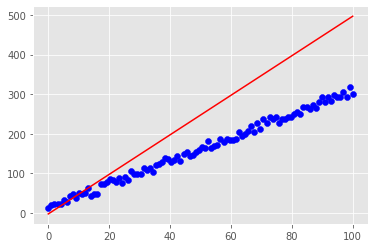

average distance: 87.60141414141415



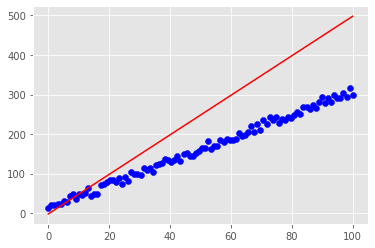

average distance: 88.40383838383839



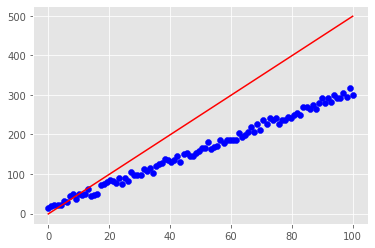

average distance: 89.2278787878788



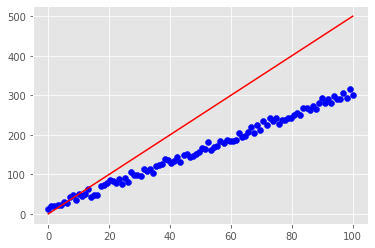

average distance: 90.0678787878788



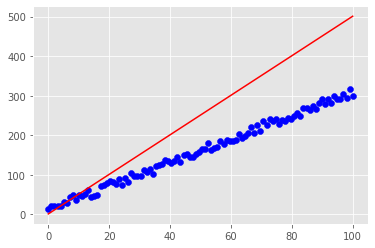

average distance: 90.9078787878788



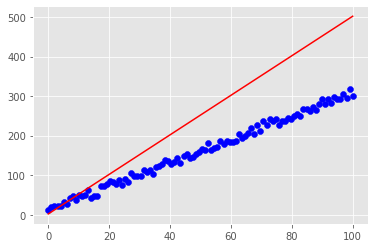

average distance: 91.74949494949496



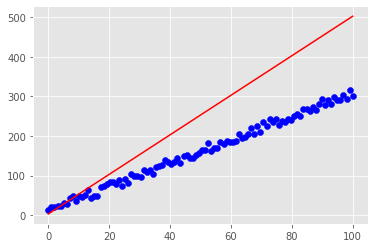

average distance: 92.60949494949496



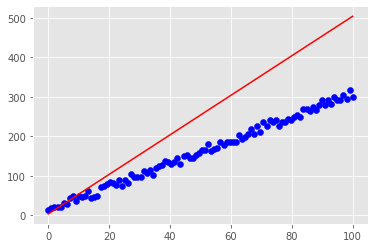

average distance: 93.46949494949496



In [3]:
# brute-force solution of rotating line and searching through space of lines for best fit

for m in range(-2,6):
  for c in range(-5,5):
    py=(m*x+c).reshape((-1,1))

    plt.plot(x,py,color="red") 
    plt.scatter(x,y,color="blue")
    plt.show()

    print("average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

Looking at the graphs, the best solution from the brute-force method doesn't seem too bad. In fact, an average distance of 6 isn't bad at all! But, there's one obvious drawback to this approach: it's very inefficient. The search space for the given data may be low, but that is not always the case. Additionally, this approach doesn't guarantee the best possible values. Unless we make the $\delta m$ and $\delta c$ very infinitesimally small (which would make this solution extremely slow), the "best" value obtained may not even be close to the best possible value. So, how do we fix this issue? We turn to a technique called **linear regression**.   

In [12]:
def lin_regression(x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  plt.title("visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

The coefficient is: 2.9289729285262736 and the intercept is: 14.599271348844553



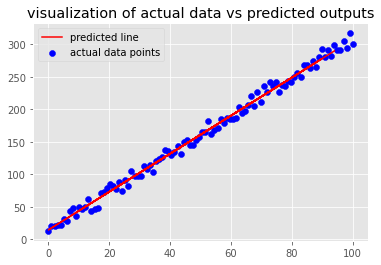

The RMSE for linear regression is: 6.849096861963223


In [13]:
lin_regression(x,y)

From the above graph, we can see that the predicted line is pretty close to the actual linear relationship between $x$ and $y$. But, how does linear regression actually work ?

The main goal of linear regression (or regression in general) is to minimize the **error** of the model. Typically, **mean squared error (MSE)** is used as the error term.

Suppose we have some data $x$ and outputs $y$. Now, we obtain some predictions $y_p$ for $x$ using our linear regression model.
The mean squared error is then defined as:

$E = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

intuitively, we can think of it as a distance between the actual value and the predicted value. By giving our regression model "feedback" on how far it is, it eventually learns the correct relationship between $x$ and $y$. So, the model tries to learn the values of $m$ and $c$ for which the equation $y=mx +c$ has the least error.

Generally, we look at the Root Mean Squared Error during analysis.

# Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [14]:
np.random.seed(30)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [15]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

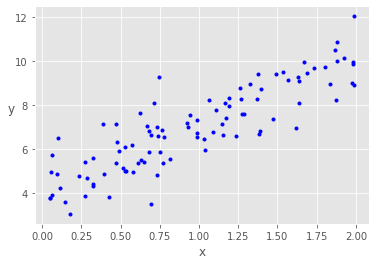

In [17]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [18]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [19]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [21]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
x_b = np.c_[np.ones((len(x), 1)), x]
y_pred, cost_history, y_pred_history = gradient_descent(x_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.847
y_pred[1]: 3.201
Final error: 4656.581


Plotting the error vs Number of iterations

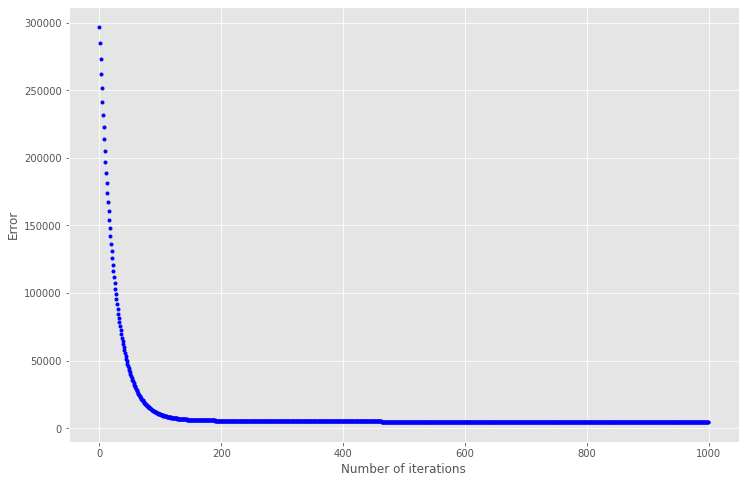

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

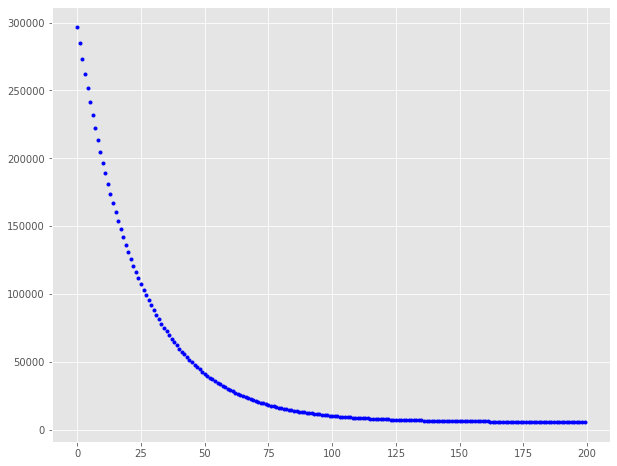

In [23]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Applying linear regression to housing data

Now that we have an idea of how linear regression works, let's apply it to predicting the price of houses. The dataset being used is the Boston housing dataset. First, let's take a look at the data.

In [24]:
housing_data = load_boston()
df = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
df.head()

# explain correlation in words

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: Nitric oxide concentration (parts per 10 million)
5. RM: Average number of rooms per dwelling
6. AGE: Proportion of owner-occupied units built prior to 1940
7. DIS: Weighted distances to five Boston employment centers
8. RAD: Index of accessibility to radial highways
9. TAX: Full-value property tax rate per \$10,000
10. PTRATIO: Pupil-teacher ratio by town
11. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
12. LSTAT: Percentage of lower status of the population
13. MEDV: Median value of owner-occupied homes in $1000s



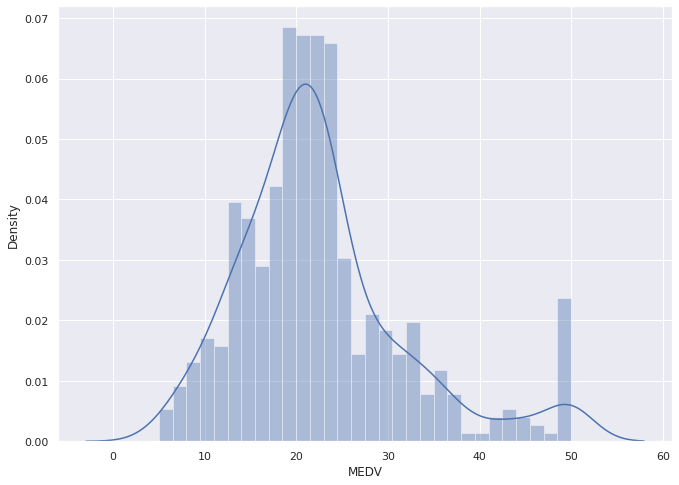

In [25]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

The target value MEDV appears to be a normal distribution with some underlying noise. To better understand the linear relationships between the features and the MEDV value, we can use a correlation matrix. This can be neatly visualized with a heatmap

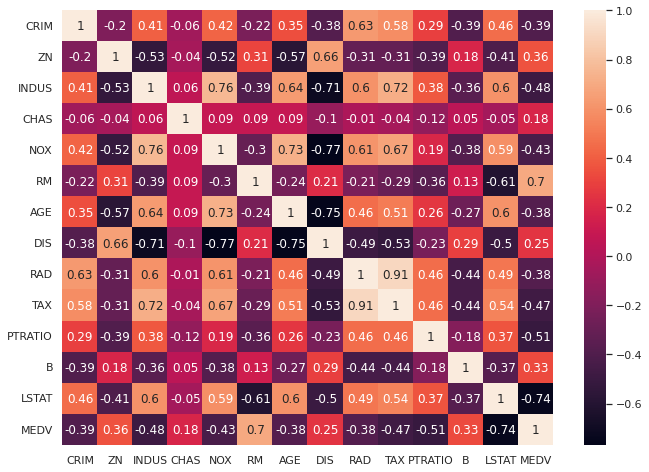

In [26]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From the plot, we see that RM has a high positive correlation with MEDV (0.7). Similarly, LSTAT has a high negative correlation with MEDv (-0.74). So, we'll pick those as the features with which we train our regression model. 

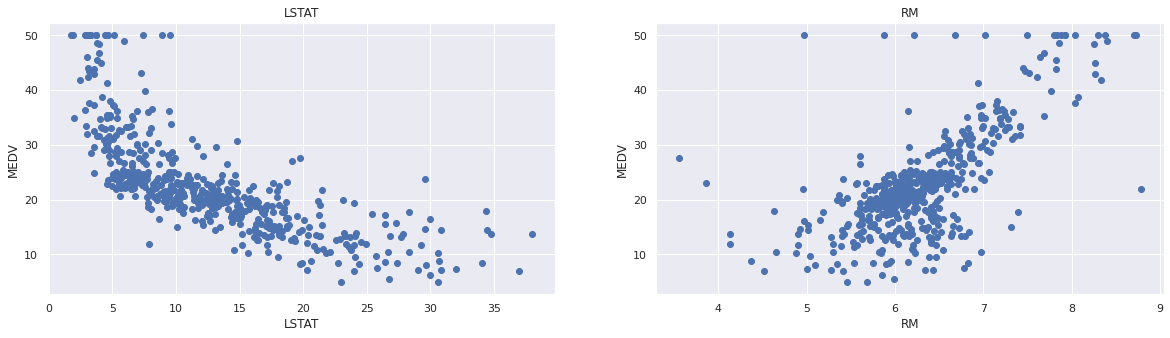

In [27]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

We can see from the two plots that the relationship between MEDV and the selected features resembles a linear relationship. 

In [28]:
x_ex = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=5)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [29]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955

Model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
